In [ ]:
"""
Graph Mining - ALTEGRAD - Dec 2021
"""

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
from random import randint
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [ ]:
############## Task 6
# Perform spectral clustering to partition graph G into k clusters
def spectral_clustering(G, k):
    m = len(G.nodes)
    A = nx.to_numpy_array(G)
    degree_sequence = [G.degree(node) for node in G.nodes()]
    D = np.diag(degree_sequence)
    #Dinv = np.([1/d if d!=0 else 0. for d in degree_sequence])
    L = np.eye(m) - np.linalg.inv(D) @ A# Dinv@A
    _,eig_vec = eigs(L,k=k,which="SM")
    eig_vec = np.real(eig_vec) 
    y_pred = KMeans(n_clusters=k, random_state=0).fit_predict(normalize(eig_vec))
    clustering = dict((i,x) for i,x in enumerate(y_pred))
    return clustering

A clustering for a 100 nodes path :
{0: 4, 1: 9, 2: 2, 3: 2, 4: 4, 5: 2, 6: 8, 7: 3, 8: 6, 9: 9, 10: 1, 11: 7, 12: 6, 13: 3, 14: 4, 15: 7, 16: 9, 17: 0, 18: 8, 19: 2, 20: 1, 21: 0, 22: 1, 23: 2, 24: 1, 25: 0, 26: 8, 27: 6, 28: 6, 29: 1, 30: 1, 31: 7, 32: 5, 33: 6, 34: 7, 35: 9, 36: 7, 37: 9, 38: 4, 39: 3, 40: 7, 41: 3, 42: 1, 43: 7, 44: 1, 45: 8, 46: 1, 47: 7, 48: 2, 49: 0, 50: 6, 51: 8, 52: 6, 53: 3, 54: 6, 55: 2, 56: 4, 57: 0, 58: 6, 59: 2, 60: 4, 61: 3, 62: 5, 63: 2, 64: 8, 65: 3, 66: 1, 67: 0, 68: 8, 69: 0, 70: 5, 71: 7, 72: 1, 73: 7, 74: 7, 75: 2, 76: 8, 77: 7, 78: 1, 79: 7, 80: 6, 81: 2, 82: 7, 83: 7, 84: 3, 85: 9, 86: 8, 87: 7, 88: 6, 89: 7, 90: 1, 91: 7, 92: 1, 93: 9, 94: 0, 95: 7, 96: 6, 97: 0, 98: 2, 99: 7}


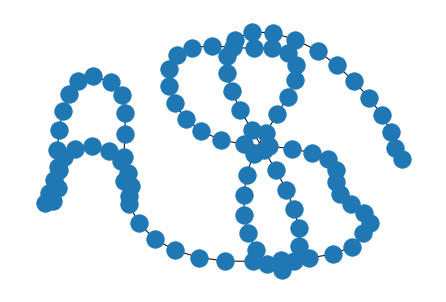

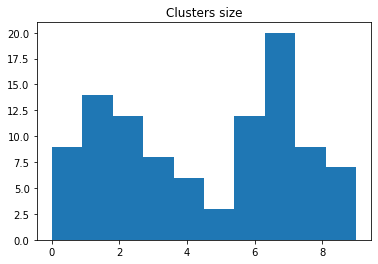

In [ ]:
path100 = nx.path_graph(100)
plt.figure()
nx.draw(path100)
print("A clustering for a 100 nodes path :")
sp_clust_path100 = spectral_clustering(path100,10)
print(sp_clust_path100)
plt.figure()
plt.hist(sp_clust_path100.values())
plt.title("Clusters size")
plt.show()


In [ ]:
G = nx.read_edgelist("./CA-HepTh.txt",comments="#",delimiter = "\t") 

print('G number of nodes :', nx.number_of_nodes(G))
print('number of edges:',nx.number_of_edges(G))

print("A spectral clustering for G, k = 50")
spectral_clusteringG50 = spectral_clustering(G,50)
print(spectral_clusteringG50)
plt.figure()
plt.hist(spectral_clusteringG50.values(),bins=50)
plt.title("Clusters size")
plt.show()
#It worked once (Approximatively 2 bins with 8000 and 1000 elements) but eigs is very slow.

G number of nodes : 9877
number of edges: 25998
A spectral clustering for G, k = 50


############# Task 7

In [ ]:
G1 = G.subgraph([str(i) for i in range(G.number_of_nodes()) if spectral_clusteringG50[i] == 1 ])

In [ ]:
spectral_clusteringG1_50 = spectral_clustering(G1,k=50)
print("A spectral clustering for G1, k = 50")
print(spectral_clusteringG1_50)
plt.figure()
plt.hist(spectral_clusteringG1_50.values(),bins=50)
plt.title("Clusters size")
plt.show()
#It worked once (approximatively uniform bins)

NameError: ignored

In [ ]:
############## Task 8
# Compute modularity value from graph G based on clustering
def modularity(G, clustering):
    m = G.number_of_nodes
    k = max(clustering.values())+1
    modularity = 0.
    #number of edge for each community 
    l_c = np.zeros(k)
    #sum of degrees for each community
    d_c = np.zeros(k)
    for i in range(m):
      l_c[clustering[i]] += len(G.edges(str(i)))
      d_c[clustering[i]] += G.degree(str(i))
    modularity = sum(l_c/m - (d_c/m)**2)
    return modularity

############# Task 9

In [ ]:
G = nx.read_edgelist("./CA-HepTh.txt",comments="#",delimiter = "\t") 

print("modularity for spectral clustering G with k = 50 :",modularity(G,clusteringG50))
treshold = rand(1,nx.numbers_of_nodes(G))
print(treshold)
dict_bool = {"True":0,"False":1}
num_nodes = nx.numbers_of_nodes(G)
rand_cluster = dict((i,i) for i in [0])#(i,dict_bool[str(i <= treshold)])
#print("modularity for a random bipartition :",modularity(G, rand_cluster)

NameError: ignored

#################
your code here #
#################